In [26]:
import pandas as pd
import matplotlib.pyplot as plt

def read_converted_chords(converted_path):
    """Reads a converted chord file and returns a pandas dataframe"""
    columns = ['root', 'bass', 'triad', 'extension_1', 'extension_2']

    return pd.read_csv(converted_path, delimiter=' ', index_col=False)

In [27]:
conv_path = "/home/thanos/Documents/Thesis/all_labels_converted.csv"

df = read_converted_chords(conv_path)
df.head(20)

,chord,root,bass,triad,extension_1,extension_2
0,N,N,N,maj,N,N
1,D,D,D,maj,N,N
2,A,A,A,maj,N,N
3,E,E,E,maj,N,N
4,E,E,E,maj,N,N
5,G,G,G,maj,N,N
6,A,A,A,maj,N,N
7,E,E,E,maj,N,N
8,G,G,G,maj,N,N
9,A,A,A,maj,N,N


In [37]:
def analyze_and_create_plots(data, column):
    # Check if the data contains the expected columns
    expected_columns = ['chord', 'root', 'bass', 'triad', 'extension_1', 'extension_2']
    if not set(expected_columns).issubset(data.columns):
        print("The data is missing expected columns.")
        return

    # Analyze the data (you can perform specific analysis here if needed)
    # For this example, let's analyze the counts of root notes.
    root_counts = data[column].value_counts()

    # Create a bar plot for root notes
    plt.figure(figsize=(10, 6))
    root_counts.plot(kind='bar')
    plt.title("Root Note Distribution")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

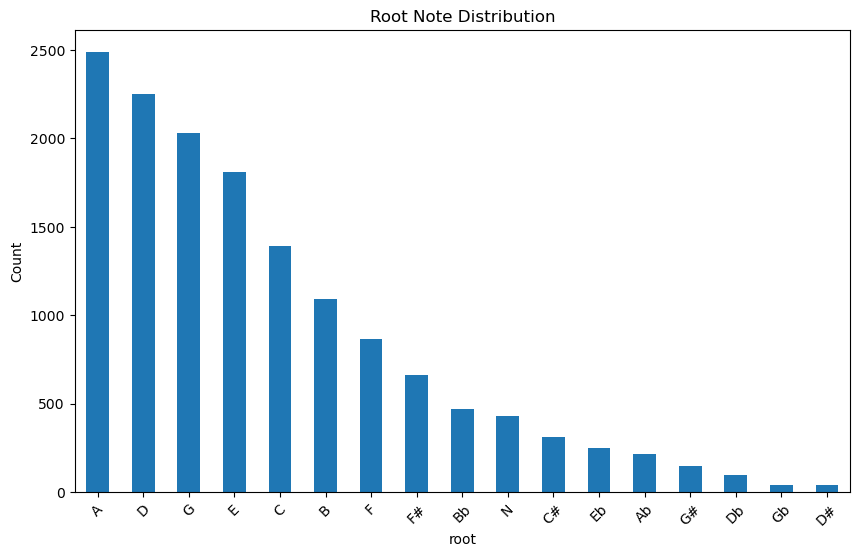

In [38]:
analyze_and_create_plots(df, 'root')

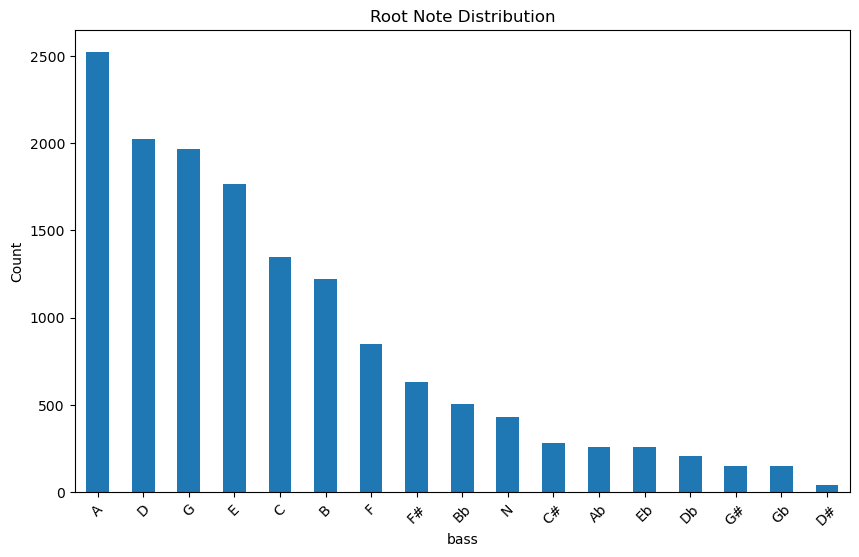

In [39]:
analyze_and_create_plots(df, 'bass')

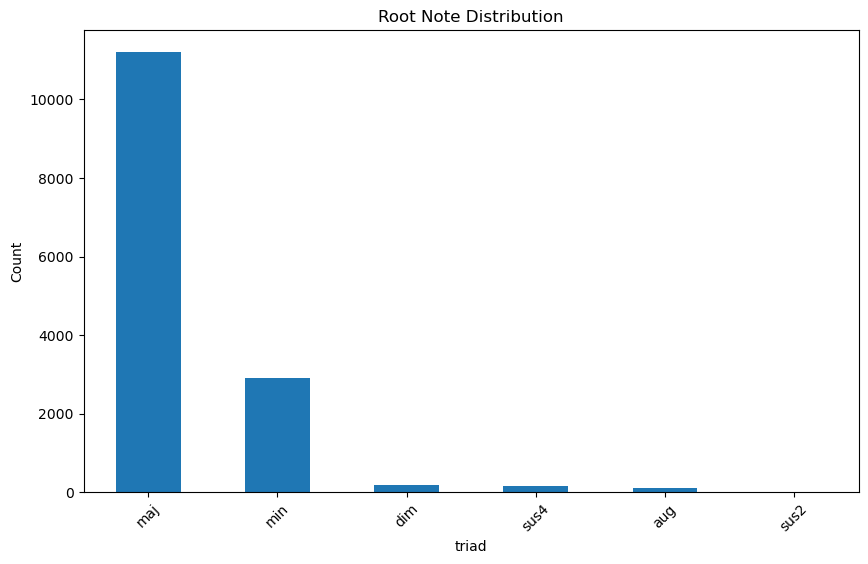

In [40]:
analyze_and_create_plots(df, 'triad')

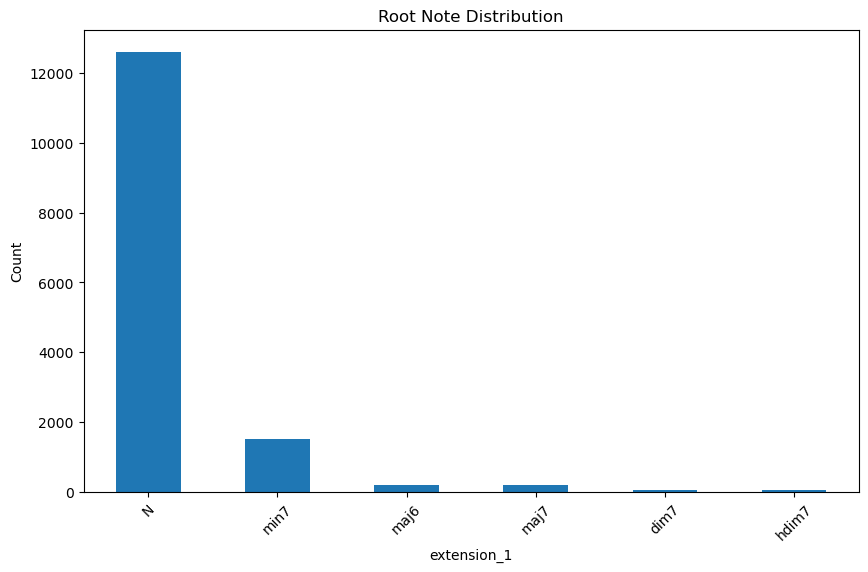

In [41]:
analyze_and_create_plots(df, 'extension_1')

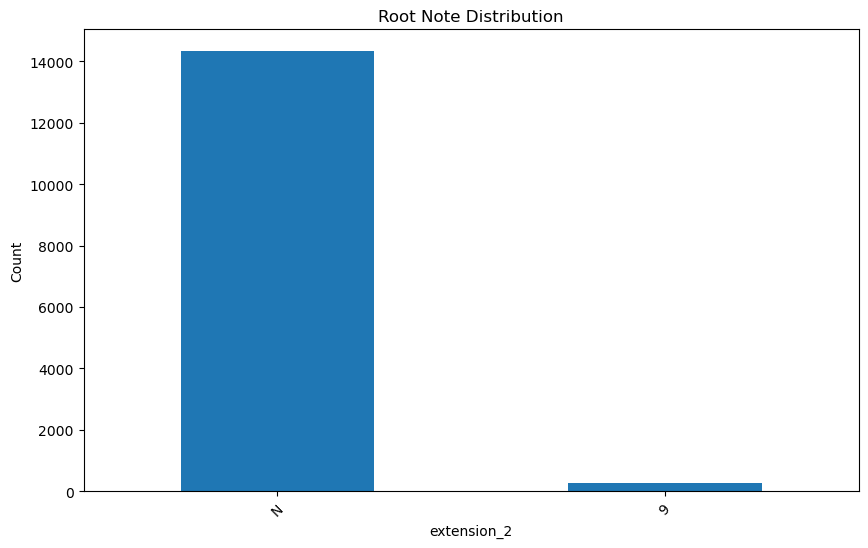

In [42]:
analyze_and_create_plots(df, 'extension_2')

In [45]:
def create_plots_for_columns(data):
    # Check if the data contains columns other than the index
    if len(data.columns) <= 1:
        print("The data does not contain columns to create plots.")
        return

    # Create subplots to display multiple plots together
    num_columns = len(data.columns)
    num_rows = 2  # Number of rows for subplots (adjust as needed)
    num_cols = (num_columns + num_rows - 1) // num_rows  # Number of columns for subplots

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))

    # Flatten the axes to iterate over them
    axes = axes.flatten()

    # Loop through the columns and create plots for each
    for i, column in enumerate(data.columns):
        if column != 'index':
            ax = axes[i]
            x_data = data[column].value_counts()
            if len(x_data)>30:
                x_data = x_data[:30]
            x_data.plot(kind='bar', ax=ax)
            ax.set_title(f'Distribution of {column}')
            ax.set_xlabel(column)
            ax.set_ylabel('Count')

    # Remove any unused subplots
    for i in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

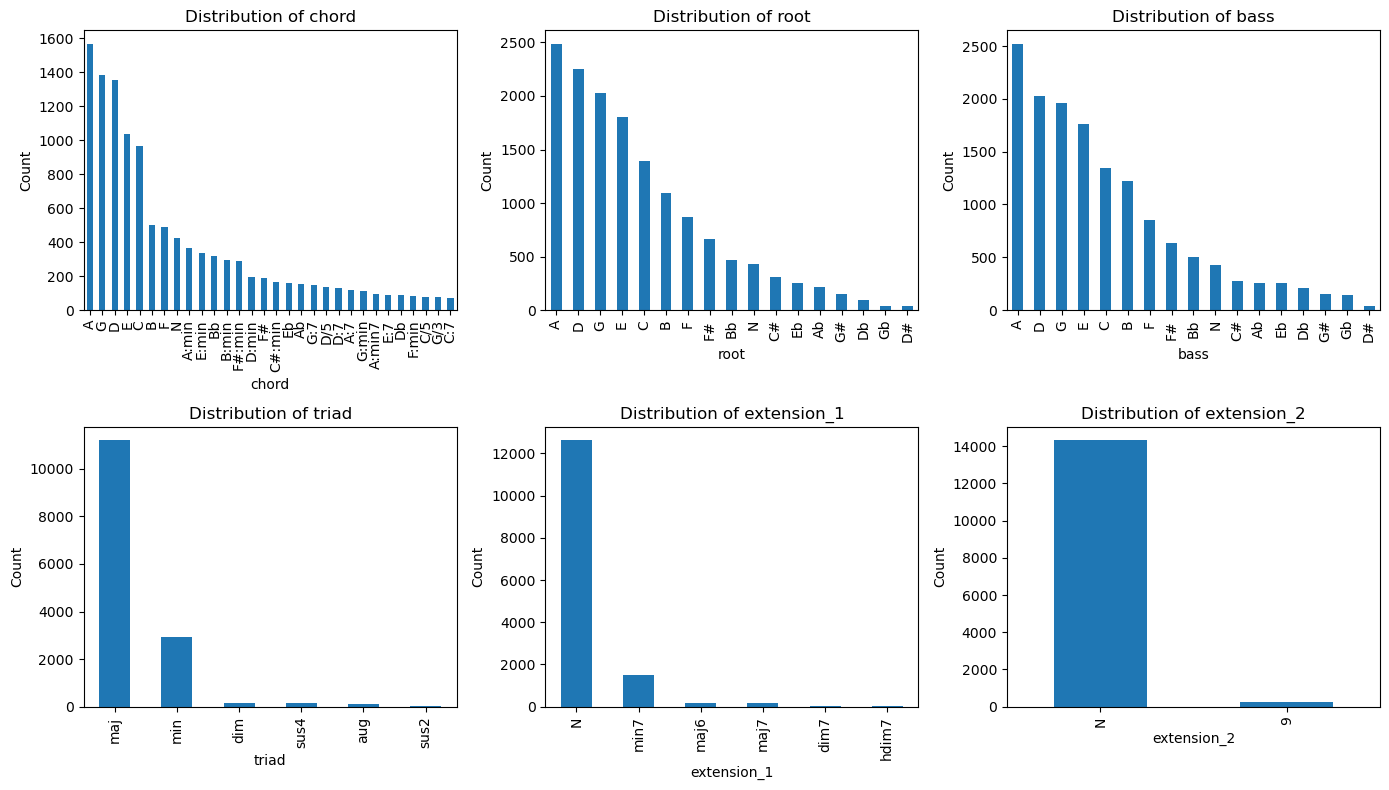

In [46]:
create_plots_for_columns(df)